In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/kaggle/input/almond/Almond.csv')

In [3]:
data.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [4]:
data.shape

(2803, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

In [6]:
data.isnull()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,False,True,False,False,False,False,True,False,False,True,True,False,False,False
1,False,True,False,False,False,False,True,False,False,True,True,False,False,False
2,False,True,False,False,False,False,True,False,False,True,True,False,False,False
3,False,True,False,False,False,False,True,False,False,True,True,False,False,False
4,False,True,False,False,False,False,True,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,False,True,False,False,False,False,True,False,False,True,True,False,False,False
2799,False,True,False,False,False,False,True,False,False,True,True,False,False,False
2800,False,True,False,False,False,False,True,False,False,True,True,False,False,False
2801,False,True,False,False,False,False,True,False,False,True,True,False,False,False


In [7]:
print(data.isnull().sum())

Unnamed: 0                     0
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64


In [8]:
data.isnull().sum().sum()

7258

In [9]:
#Code to fill missing values with the mean of each column
data['Length (major axis)'] = data['Length (major axis)'].fillna(data['Length (major axis)'].mean())
data['Width (minor axis)'] = data['Width (minor axis)'].fillna(data['Width (minor axis)'].mean())
data['Thickness (depth)'] = data['Thickness (depth)'].fillna(data['Thickness (depth)'].mean())
data['Roundness'] = data['Roundness'].fillna(data['Roundness'].mean())
data['Aspect Ratio'] = data['Aspect Ratio'].fillna(data['Aspect Ratio'].mean())
data['Eccentricity'] = data['Eccentricity'].fillna(data['Eccentricity'].mean())

#Check the data for missing values
print(data.isnull().sum())


Unnamed: 0                  0
Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                0
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64


In [10]:
data

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,290.609274,227.940628,127.759132,22619.0,643.813269,0.470466,0.973384,1.458265,1.753216,0.813114,0.681193,23237.5,MAMRA
1,1,290.609274,234.188126,128.199509,23038.0,680.984841,0.470466,0.957304,1.601844,1.753216,0.813114,0.656353,24065.5,MAMRA
2,2,290.609274,229.418610,125.796547,22386.5,646.943212,0.470466,0.967270,1.487772,1.753216,0.813114,0.683620,23144.0,MAMRA
3,3,290.609274,232.763153,125.918808,22578.5,661.227483,0.470466,0.965512,1.540979,1.753216,0.813114,0.685360,23385.0,MAMRA
4,4,290.609274,230.150742,107.253448,19068.0,624.842706,0.470466,0.951450,1.629395,1.753216,0.813114,0.714800,20041.0,MAMRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,2798,290.609274,192.709366,122.356506,18471.5,653.345233,0.470466,0.931000,1.838965,1.753216,0.813114,0.725739,19840.5,SANORA
2799,2799,290.609274,186.254745,118.708961,17213.5,581.688379,0.470466,0.952706,1.564234,1.753216,0.813114,0.714016,18068.0,SANORA
2800,2800,290.609274,186.196182,119.147224,17510.5,608.315795,0.470466,0.948821,1.681705,1.753216,0.813114,0.718999,18455.0,SANORA
2801,2801,290.609274,188.660828,120.634438,17941.0,630.759446,0.470466,0.944810,1.764701,1.753216,0.813114,0.738191,18989.0,SANORA


In [11]:
data.isnull()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2799,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2800,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2801,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop('Type', axis=1))

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers

#Model definition using Input layer
model = tf.keras.Sequential([
    tf.keras.Input(shape=(data_scaled.shape[1],)),  #Explicit Input layer
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  #3 output classes
])

#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#String labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Type'])

#Split data with encoded labels
X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, y_encoded, test_size=0.2, random_state=42
)

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4949 - loss: 1.0627 - val_accuracy: 0.6637 - val_loss: 0.9379
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - loss: 0.8962 - val_accuracy: 0.6860 - val_loss: 0.8062
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7075 - loss: 0.7740 - val_accuracy: 0.6704 - val_loss: 0.7453
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7368 - loss: 0.6806 - val_accuracy: 0.7394 - val_loss: 0.6808
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7495 - loss: 0.6506 - val_accuracy: 0.7728 - val_loss: 0.6557
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7806 - loss: 0.6069 - val_accuracy: 0.7617 - val_loss: 0.6177
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7671 - loss: 0.5850 - val_accuracy: 0.7706 - val_loss: 0.5869
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7862 - loss: 0.5539 - val_accuracy: 0.7595 - v

In [15]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV, train_test_split

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, neurons=64, learning_rate=0.001, epochs=50, batch_size=32, verbose=0):
        self.neurons = neurons
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None

    def build_model(self):
        model = tf.keras.Sequential([
            tf.keras.Input(shape=(data_scaled.shape[1],)),  
            tf.keras.layers.Dense(self.neurons, activation='relu'),
            tf.keras.layers.Dense(self.neurons, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate),
                      loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        probabilities = self.model_.predict(X)
        return np.argmax(probabilities, axis=1)


model = KerasClassifierWrapper()
param_grid = {'neurons': [32, 64, 128], 'learning_rate': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

#Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━

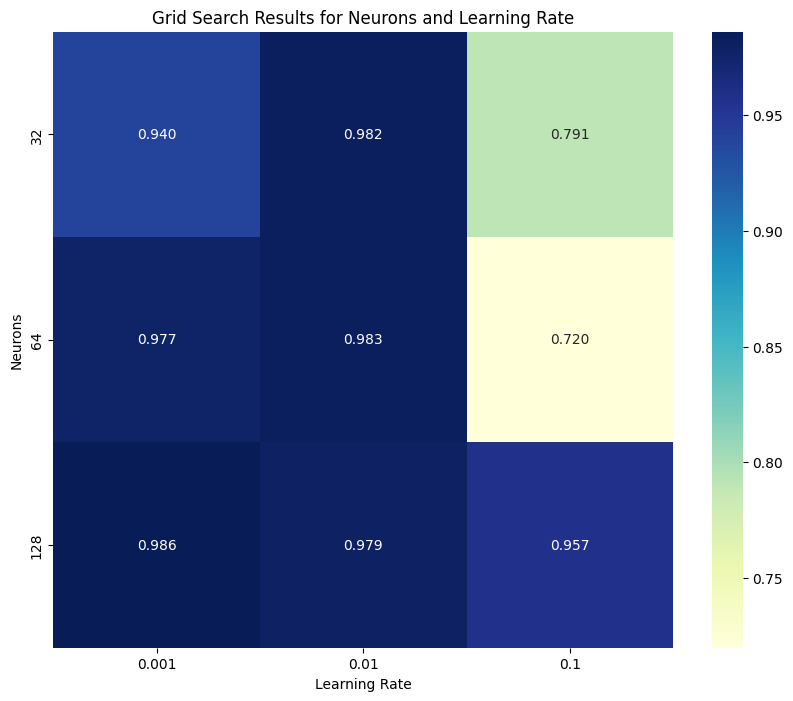

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Perform grid search
model = KerasClassifierWrapper()
param_grid = {'neurons': [32, 64, 128], 'learning_rate': [0.001, 0.01, 0.1]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

#Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

#Extract results from grid search
results = pd.DataFrame(grid_result.cv_results_)

# Pivot the data for heatmap
heatmap_data = results.pivot(index='param_neurons', columns='param_learning_rate', values='mean_test_score')

# Plotting the heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")  
plt.title('Grid Search Results for Neurons and Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Neurons')
plt.show()


In [17]:
#Two optimizers: rprop_optimizer, adam_optimizer
def hybrid_update(weight_updates_rprop, weight_updates_adam):
    return (weight_updates_rprop + weight_updates_adam) / 2



In [18]:
#RProp model
model.fit(X_train, y_train) # Call fit to build and compile the model first
model.model_.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Now you can compile with the desired optimizer
#Call fit on the model_ attribute
history_rprop = model.model_.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2) 

#Adam model
model.fit(X_train, y_train) # Call fit to build and compile the model first
model.model_.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Now you can compile with the desired optimizer
#Call fit on the model_ attribute, n
history_adam = model.model_.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9678 - loss: 0.0878 - val_accuracy: 0.9065 - val_loss: 0.2082
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9799 - loss: 0.0749 - val_accuracy: 0.7639 - val_loss: 0.5261
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9619 - loss: 0.1114 - val_accuracy: 0.9131 - val_loss: 0.1851
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9753 - loss: 0.0807 - val_accuracy: 0.9755 - val_loss: 0.0768
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9870 - loss: 0.0596 - val_accuracy: 0.9042 - val_loss: 0.2202
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9826 - loss: 0.0787 - val_accuracy: 0.9889 - val_loss: 0.0675
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9845 - loss: 0.0584 - val_accuracy: 0.9844 - val_loss: 0.0554
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9849 - loss: 0.0573 - val_accuracy: 0.9866 - v

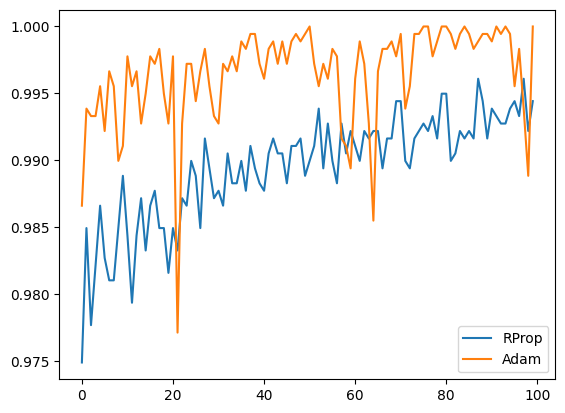

In [19]:
plt.plot(history_rprop.history['accuracy'], label='RProp')
plt.plot(history_adam.history['accuracy'], label='Adam')
plt.legend()
plt.show()